## Wine quality analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as mpt
import seaborn as sb

In [5]:
data = pd.read_csv("Wine_Quality_Data.csv")

In [6]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [8]:
data['color'].unique()

array(['red', 'white'], dtype=object)

In [9]:
color_changer = {
    'red': 0,
    'white':1
}

In [10]:
data['color'] = data['color'].map(color_changer)

In [11]:
# def qualityconv(x):
#     x=float(x)
#     return x

In [12]:
# data['quality'] = data['quality'].apply(qualityconv)

In [13]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                     int64
dtype: object

### Observing heatmap

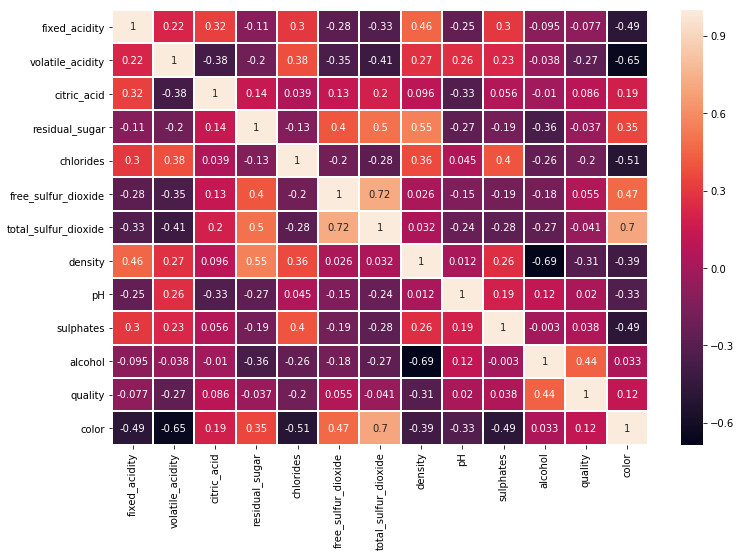

In [14]:
mpt.figure(figsize=(12,8))
sb.heatmap(data.corr(), annot=True, linewidth=1, linecolor='w')

In [15]:
training_data = data[['alcohol', 'density', 'volatile_acidity', 'chlorides']]

In [16]:
output_data = data['quality']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X, x_test, Y, y_test = train_test_split(training_data, output_data, test_size=0.3, random_state=42)

### Performing logistic regression algo

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
linear_model = LogisticRegression()

In [21]:
linear_model.fit(X,Y)

C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
predictions = linear_model.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
confusion_matrix(predictions, y_test)

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  3,  47, 381, 273,  28,   3,   0],
       [  6,  22, 230, 612, 275,  44,   1],
       [  0,   0,   2,   9,  12,   2,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [25]:
score = accuracy_score(predictions, y_test)
score

0.5153846153846153

### Through KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn_model = KNeighborsClassifier()

In [28]:
knn_model.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
knn_predictions = knn_model.predict(x_test)

In [30]:
knn_score = accuracy_score(knn_predictions, y_test)
knn_score

0.49538461538461537

### Performing grid search

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
para = {'n_neighbors':[5,10, 13, 15]}

In [33]:
grid_model = GridSearchCV(KNeighborsClassifier(), param_grid=para)

In [34]:
grid_model.fit(X,Y)

C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [5, 10, 13, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
grid_model.best_params_

{'n_neighbors': 15}

In [36]:
grid_model.best_score_

0.5306795689465582

### Decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
tree_model=DecisionTreeClassifier()

In [39]:
tree_model.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
tree_model_prediction = tree_model.predict(x_test)

In [41]:
tree_score = accuracy_score(tree_model_prediction, y_test)

In [42]:
tree_score

0.5723076923076923

In [ ]:
features = list

In [54]:
from sklearn import tree

In [56]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(tree_model, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png("Hiring-Decision.png")
#Image(graph.create_png())  

NameError: name 'features' is not defined

### Performing ensemble learning

In [43]:
from sklearn.svm import SVC

In [44]:
svm_model = SVC()

In [45]:
svm_model.fit(X, Y)

C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [46]:
svm_predictions = svm_model.predict(x_test)

In [47]:
svm_score = accuracy_score(svm_predictions, y_test)
svm_score

0.5256410256410257

In [48]:
svm_parameters = {
    'C':[0.01, 0.1, 1, 10, 100 ]
}

In [49]:
grid_search_svm = GridSearchCV(SVC(kernel='rbf'), param_grid=svm_parameters)

In [50]:
grid_search_svm.fit(X, Y)

C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [51]:
grid_search_svm.best_params_

{'C': 100}

In [52]:
grid_search_svm.best_score_

0.5289201671431714